##Encoder Model
###Implementation of paper "Photoshop 2.0:Generative Adversarial Networks for Photo Editing".

###Importing Datset from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_celeba/197600.jpg   
  inflating: img_celeba/197601.jpg   
  inflating: img_celeba/197602.jpg   
  inflating: img_celeba/197603.jpg   
  inflating: img_celeba/197604.jpg   
  inflating: img_celeba/197605.jpg   
  inflating: img_celeba/197606.jpg   
  inflating: img_celeba/197607.jpg   
  inflating: img_celeba/197608.jpg   
  inflating: img_celeba/197609.jpg   
  inflating: img_celeba/197610.jpg   
  inflating: img_celeba/197611.jpg   
  inflating: img_celeba/197612.jpg   
  inflating: img_celeba/197613.jpg   
  inflating: img_celeba/197614.jpg   
  inflating: img_celeba/197615.jpg   
  inflating: img_celeba/197616.jpg   
  inflating: img_celeba/197617.jpg   
  inflating: img_celeba/197618.jpg   
  inflating: img_celeba/197619.jpg   
  inflating: img_celeba/197620.jpg   
  inflating: img_celeba/197621.jpg   
  inflating: img_celeba/197622.jpg   
  inflating: img_celeba/197623.jpg   
  inflating: img_celeba/197624.jpg   

In [3]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip' > /dev/null

replace img_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


###Importing Required Packages and Libraries

In [4]:
import numpy as np 
from glob import glob
import random
from PIL import Image 
import os 
import scipy.misc

In [5]:
from keras.preprocessing.image import save_img
from keras.preprocessing.image import array_to_img

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
print(tf.__version__)

2.4.1


##Encoder Class Model

Model of DeepConv Encoder as discussed in the original paper is given bellow

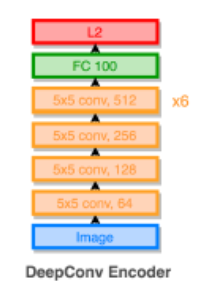

In [8]:
class Encoder:
    
    def __init__(self, lr_rate_en, input_shape, z_dim, no_of_im, beta1=0.5, alpha=0.2):

        # Initialising the variables (Learning Rate, Input Shape of Image, Latent Space dimension of z-vector, Number of Images)
        self.lr_rate_en = tf.Variable(lr_rate_en, trainable=False, name="Encoder_lr")
        self.input_shape = input_shape
        self.z_dim = z_dim
        self.im_num = no_of_im

        # Intialising placeholder for input of Encoder
        self.input_images = tf.placeholder(dtype=tf.float32, shape=(None, input_shape[0], input_shape[1], input_shape[2]), name="input_encoder")

        # Calling the model_loss function
        self.en_loss, self.en_gen_img, self.en_logits = self.model_loss(self.input_images, self.z_dim, self.input_shape[2], self.im_num)

        # Calling the model_opti function
        self.en_opt = self.model_opti(self.en_loss, self.lr_rate_en, beta1)
        
    
    """
    Encoder: Function defining the Model of Encoder
    """ 

    def encoder(self, images, alpha=0.2, reuse=False):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope("encoder", reuse=reuse):
            
           # Defining the first CONV layer : Number of Filters = 64, Kernel = 5x5, Stride = 2
           conv1 = tf.layers.conv2d(images, 64, 5, 2, padding='SAME', kernel_initializer=w_init)
           # Defining a Leaky ReLu layer as specified in Original Paper
           lrelu1 = tf.nn.leaky_relu(conv1, alpha=alpha)
           
           # Defining the second CONV layer : Number of Filters = 128, Kernel = 5x5, Stride = 2
           conv2 = tf.layers.conv2d(lrelu1, 128, 5, 2, padding='SAME',  kernel_initializer=w_init)
           bn_norm1 = tf.layers.batch_normalization(conv2, training=True)
           lrelu2 = tf.nn.leaky_relu(bn_norm1, alpha=alpha)
           
           # Defining the third CONV layer : Number of Filters = 256, Kernel = 5x5, Stride = 2
           conv3 = tf.layers.conv2d(lrelu2, 256, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm2 = tf.layers.batch_normalization(conv3, training=True)
           lrelu3 = tf.nn.leaky_relu(bn_norm2, alpha=alpha)
           
           # Defining the Six blocks of CONV layer : Number of Filters = 512, Kernel = 5x5, Stride = 2
           # First block
           conv4 = tf.layers.conv2d(lrelu3, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm3 = tf.layers.batch_normalization(conv4, training=True)
           lrelu4 = tf.nn.leaky_relu(bn_norm3, alpha=alpha)
           
           # Second block
           conv5 = tf.layers.conv2d(lrelu4, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm4 = tf.layers.batch_normalization(conv5, training=True)
           lrelu5 = tf.nn.leaky_relu(bn_norm4, alpha=alpha)
           
           # Third block
           conv6 = tf.layers.conv2d(lrelu5, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm5 = tf.layers.batch_normalization(conv6, training=True)
           lrelu6 = tf.nn.leaky_relu(bn_norm5, alpha=alpha)
           
           # Fourth block
           conv7 = tf.layers.conv2d(lrelu6, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm6 = tf.layers.batch_normalization(conv7, training=True)
           lrelu7 = tf.nn.leaky_relu(bn_norm6, alpha=alpha)
           
           # Five block
           conv8 = tf.layers.conv2d(lrelu7, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm7 = tf.layers.batch_normalization(conv8, training=True)
           lrelu8 = tf.nn.leaky_relu(bn_norm7, alpha=alpha)
           
           # Sixth block
           conv9 = tf.layers.conv2d(lrelu8, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           
           flat = tf.reshape(conv9, (-1,512))
           
           # Applying a Dense layer of 100 nodes
           # here we are choosing 100 nodes for the dense layer because our z-vector dimension is 100 and 
           # output of Encoder will be fed as input to Generator
           logits = tf.layers.dense(flat, 100, kernel_initializer=w_init)
           
           return logits


    
    """
    Generator. Same as the generator of DCGAN. 
    """

    def generator(self, z, out_channel_dim, is_train=True):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope('generator', reuse = False if is_train==True else True):
            
            # Defining the shape of z-vector (1x1x100)
            x1 = tf.reshape(z, (-1,1,1,100))
            
            # Adding the first Deconv layer 
            # 512 filters of 4x4 (kernel = 4) with stride = 1
            deconv1 = tf.layers.conv2d_transpose(x1, 512, 4, 1, padding='VALID', kernel_initializer=w_init)
            # Applying the Spatial Batch Normalisation layer
            bn_norm1 = tf.layers.batch_normalization(deconv1, training=is_train)
            # Applying the ReLu function
            relu1 = tf.nn.relu(bn_norm1)
            
            # Adding the second Deconv layer 
            # 256 filters of 4x4 (kernel = 4) with stride = 2
            deconv2 = tf.layers.conv2d_transpose(relu1, 256, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm2 = tf.layers.batch_normalization(deconv2, training=is_train)
            relu2 = tf.nn.relu(bn_norm2)
            
            # Adding the third Deconv layer 
            # 128 filters of 4x4 (kernel = 4) with stride = 2
            deconv3 = tf.layers.conv2d_transpose(relu2, 128, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm3 = tf.layers.batch_normalization(deconv3, training=is_train)
            relu3 = tf.nn.relu(bn_norm3)
            
            # Adding the fourth Deconv layer 
            # 64 filters of 4x4 (kernel = 4) with stride = 2
            deconv4 = tf.layers.conv2d_transpose(relu3, 64, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm4 = tf.layers.batch_normalization(deconv4, training=is_train)
            relu4 = tf.nn.relu(bn_norm4)
            
            # Adding the fifth Deconv layer 
            # output dimension filters of 4x4 (kernel = 4) with stride = 2
            deconv5 = tf.layers.conv2d_transpose(relu4, out_channel_dim, 4, 2, padding='SAME', kernel_initializer=w_init)
            
            logits = deconv5
            out = tf.tanh(deconv5, name="generator_out")
            
            return out, logits  


    
    """
    Function to calculate loss for the encoder. Calculates L2 Loss between generated images and input images.
    Returns the loss, generated image and the input image encoding. 
    """

    def model_loss(self, input_images, z_dim, out_channel_dim, im_num):

        # Calling Encoder fucntion
        en_logits = self.encoder(input_images)

        # Calling the Generator function
        # out_channel_dim = image_shape[2] means the numbers of pixels because the Image that generator produces should have pixel number equal to image shape
        gen_images,_ = self.generator(en_logits, out_channel_dim)

        gen_images = tf.reshape(gen_images, shape=(im_num, 64, 64, 3))  
        
        # Calculating loss of Encoder
        # Here we are calculating L2 loss between input_image and gen_image
        en_loss = tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(tf.squared_difference(input_images, gen_images), axis=3), axis=2), axis=1))

        return en_loss, gen_images, en_logits
    

    
    """
    Train the encoder using Adam Optimizer.
    """

    def model_opti(self, en_loss, lr_rate, beta1):
        
        train_vars = tf.trainable_variables()
        # Separating the Variables of Encoder
        en_vars = [var for var in train_vars if var.name.startswith('encoder')]
        
        # Optimize the parameters of encoder such that it reduces the encoder loss
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            en_train_opt = tf.train.AdamOptimizer(lr_rate, beta1=beta1).minimize(en_loss, var_list = en_vars)
        
        # returning the optimized parameters
        return en_train_opt

##Training the Model

The Network Architecture of Model is as shown below

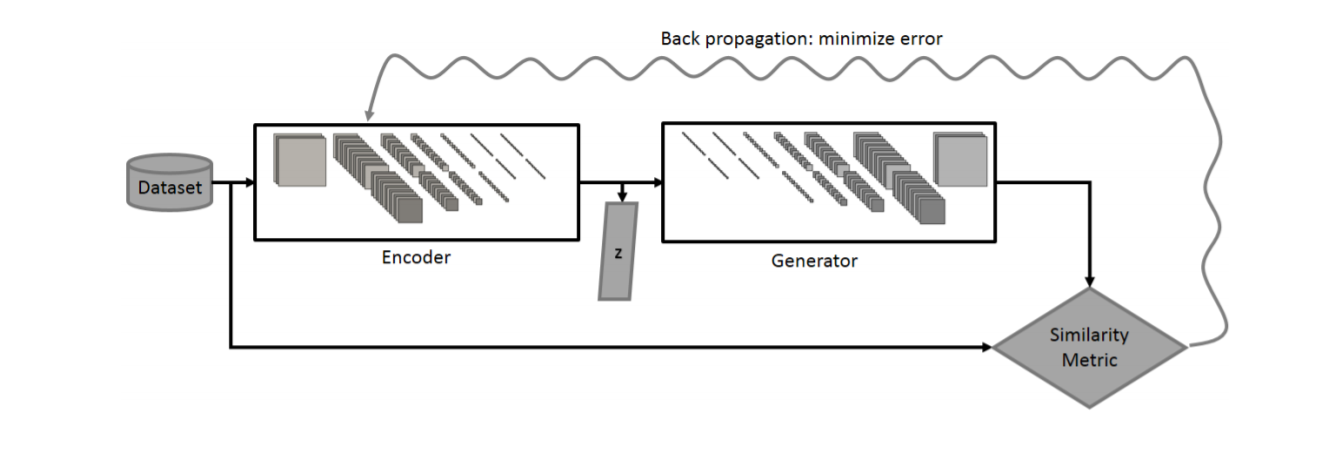

In [9]:
"""
Function to get image from path and rescale it to [-1,1]
"""

def get_image_new(image_path, width, height):

    image = Image.open(image_path) 

    # crop image to reduce clutter 
    image = image.crop([30,40,168,178])

    # Resizing image to smaller size 
    # Image.BILINEAR is for 2x2 linear interpolation
    image = image.resize([width,height], Image.BILINEAR)

    # Normalisation steps
    image = np.array(image, dtype=np.float32)
    image = np.divide(image, 255)
    image = np.subtract(image, 0.5)

    #scaling image to [-1,1]
    image = np.multiply(image, 2)   

    return image

The following function is for getting the z-vectors in the latent space for all the images. For this all the images are feed as input to the Encoder which will give z-vectors as output and combine all the z-vectors of all the images

In [10]:
"""
Function to get the labels for the images in the database using the attribute label file   
"""

def avg_z(data_files, en_net, batch_size, encoder_dir):

    # for storing the z-vectors of all the images
    z_vect = []

    # this is for calculating total images required for making perfect batches from dataset
    max_bs_len = int(len(data_files)/batch_size)*batch_size
    saver = tf.train.Saver()

    with tf.Session() as sess:
      # restoring the trained Encoder for calculating z-vectors
      sess.run(tf.global_variables_initializer())  
      saver.restore(sess, encoder_dir)
      bs = 0

      while bs < max_bs_len:
          # converting images to NumPy array using function get_image_new
          img = np.array([get_image_new(sample_file, 64, 64) for sample_file in data_files[bs:(bs+64)]]).astype(np.float32) 

          # For calculating the z-vectors in latent space for all the images
          log_en = sess.run(en_net.en_logits, feed_dict={en_net.input_images:img})

          for log in log_en:
              z_vect.append(log)

          #print ("appending %r" %(bs))
          bs = bs + 64 
    
    print("\nAttribute Encoding Done\n")     
        
    return z_vect

This function is for getting the Attribute Labels for all images. That is for reading the datafile present in Dataset which tells us that which attributes are present in the Image

In [11]:
def get_labels(file_path):

    with open(file_path,"r") as f:
        label = f.readlines()

    i = 1
    # for storing the labesl of all the images
    labels = []
    
    # for reading each line of datafile
    while i < len(label):
        # for storing the labels attribute present in tha image
        lab = []

        for k in label[i].split('\t'):
            if k != '':
                lab.append(k.split('\n')[0])

        labels.append(lab)
        i = i+1
        if i % 5000 == 0:
            print ("labelling =%r" %(i))
        
    labels = np.array(labels)
    # getting the names of attributes as the first line of sheet contains names of attributes
    attributes = np.array(label[0].split('\t'))
    attributes[40] = attributes[40].split('\n')[0]
    
    return labels, attributes

This function is for calculating the latent space vectors for all the attributes and stroing them in the file

In [12]:
def create_avg_file(attr_label_file, data_files, encoder_dir, attr_encoding_file):
    # defining hyperparameters
    batch_size = 64
    z_dim = 100
    lr_rate = 0.0002
    beta1 = 0.5
    alpha = 0.2
    shape = 64,64,3
    tf.reset_default_graph()
    
    # initialising the Encoder network
    en_net = Encoder(lr_rate, shape, z_dim, batch_size, beta1, alpha)
    
    # Calculating z-vectors for all the images
    z_vect = avg_z(data_files, en_net, batch_size, encoder_dir)
    print (len(z_vect))
    
    labels, attributes = get_labels(attr_label_file)
    
    # function for calculating latent space vector corresponding to each attribute
    # they are calculated by separating the images having and not having that attribute and then taking mean of all the images in set and then 
    # subtracting both the latent space vectors

    for i in range(len(attributes)-1):
        
        # stroing images that have and not have the attribute
        has = []
        has_not = []

        # iterating over all the images
        for k in range(len(z_vect)):
            # storing the images that have the attribute
            # k is the image and i+1 is the attribute
            if labels[k][i+1]=='1':
                has.append(z_vect[k])
            # storing the images that does not have the attribute
            # k is the image and i+1 is the attribute
            elif labels[k][i+1]=='-1':
                has_not.append(z_vect[k])

        mean_has = 0
        mean_has_not = 0

        # taking sum of z-vectors of all the images that have the attribute
        for j in range(len(has)):
            mean_has = mean_has + has[j]
        # calculating its mean
        mean_has = mean_has/len(has)

        # taking sum of z-vectors of all the images that does not have the attribute
        for j in range(len(has_not)):
            mean_has_not = mean_has_not + has_not[j]
        # calculating its mean
        mean_has_not = mean_has_not/len(has_not)
        
        # calculating the latent space vector corresponding the attribute by subtracting both these vectors
        attr_i = mean_has - mean_has_not
        print ("attr encoded")

        attr_i = np.reshape(attr_i,(100))

        # writing the attribute latent space in the file 
        with open(attr_encoding_file, "a") as f:
            for i in range(attr_i.shape[0]):
                f.write(str(attr_i[i]) + " ")
            f.write("\n")


In [13]:
data_path = '/content/img_celeba/' 
input_fname_pattern = "*.jpg"
encoder_dir = '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Encoder_saved_model/try_epoch_24/' 
attribute_file = '/content/drive/MyDrive/Colab Notebooks/GAN/Face Editing/Dataset/list_attr_celeba.txt'
attr_encoding_file = '/content/drive/MyDrive/Colab Notebooks/GAN/Face Editing/Dataset/attributes_encodings.txt'

In [14]:
# CelebA Face Database 
data_files = glob(data_path+input_fname_pattern)

In [15]:
create_avg_file(attribute_file, data_files, encoder_dir, attr_encoding_file)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  '`tf.layers.batch_normalizat

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Encoder_saved_model/try_epoch_24/

Attribute Encoding Done

202560
labelling =5000
labelling =10000
labelling =15000
labelling =20000
labelling =25000
labelling =30000
labelling =35000
labelling =40000
labelling =45000
labelling =50000
labelling =55000
labelling =60000
labelling =65000
labelling =70000
labelling =75000
labelling =80000
labelling =85000
labelling =90000
labelling =95000
labelling =100000
labelling =105000
labelling =110000
labelling =115000
labelling =120000
labelling =125000
labelling =130000
labelling =135000
labelling =140000
labelling =145000
labelling =150000
labelling =155000
labelling =160000
labelling =165000
labelling =170000
labelling =175000
labelling =180000
labelling =185000
labelling =190000
labelling =195000
labelling =200000
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr encoded
attr